# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [2]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df = df.iloc[1: , :]
df.head()

,age,operation_Year,axil_nodes,survival_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

#### Number of rows and columns.

In [4]:
print("Rows {}, Columns {}".format(df.shape[0],df.shape[1]))

Rows 306, Columns 4


#### Names of different features in the dataset. Also the target variable in the data.

In [11]:
print("Following {} features are present in the dataset".format(df.shape[1] - 1))
x = list(df.columns)
print(x[:-1])
print("Target variable in the dataset is :")
print(x[-1])

Following 3 features are present in the dataset
['age', 'operation_Year', 'axil_nodes']
Target variable in the dataset is :
survival_status


In [12]:
print("Number of data points available in each class.")
df['survival_status'].value_counts()

Number of data points available in each class.


1    225
2     81
Name: survival_status, dtype: int64

In [17]:
df.dtypes

age                object
operation_Year     object
axil_nodes         object
survival_status    object
dtype: object

In [21]:
#All the data types of given features is object. Let's convert them to int.
for feature in x:
    df[feature]=df[feature].astype(str).astype(int)
df.dtypes

age                int64
operation_Year     int64
axil_nodes         int64
survival_status    int64
dtype: object

#### Information about the features:
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

- Objective: To build a model to predict the survival (>5years or <5years) of a breast cancer patient when age, year of operation, number of positive axillary nodes detected is given.

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

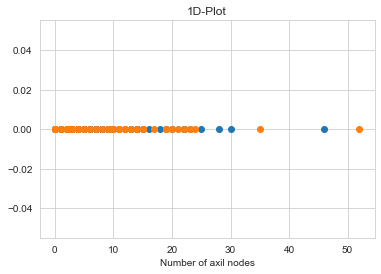

In [29]:
import numpy as np

great_5 = df.loc[df['survival_status'] == 1]
less_5 = df.loc[df['survival_status'] == 2]

plt.xlabel('Number of axil nodes')
plt.title('1D-Plot')
plt.plot(great_5['axil_nodes'], np.zeros_like(great_5['axil_nodes']), 'o')
plt.plot(less_5['axil_nodes'], np.zeros_like(less_5['axil_nodes']), 'o')

- Can't make much sense, points are coinciding, though we can say that there are more less than 5 year points where number of axil nodes are greater than something around 25

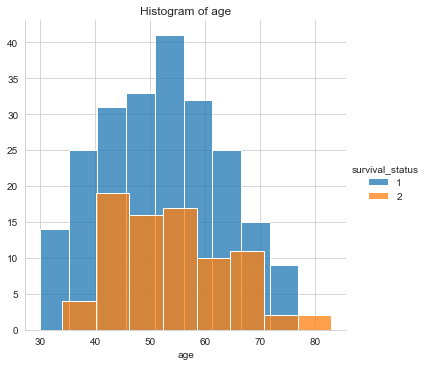

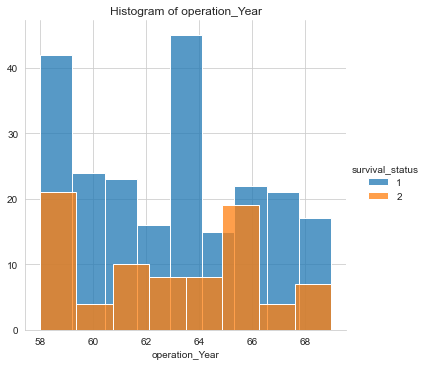

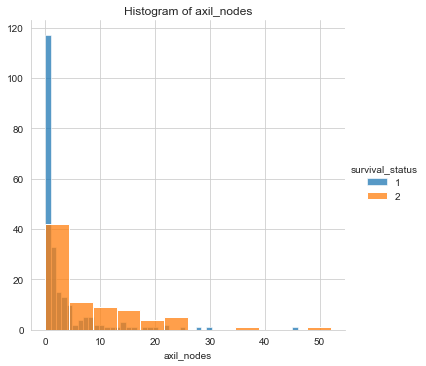

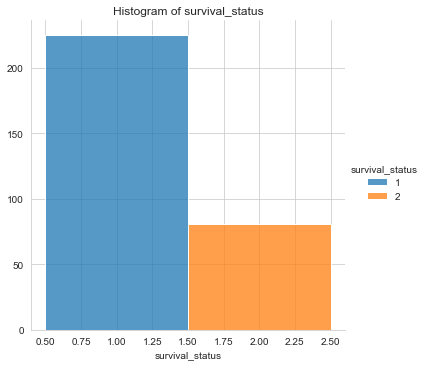

In [37]:
for feature in x:
    sns.FacetGrid(df, hue="survival_status", height=5) \
       .map(sns.histplot, feature) \
       .add_legend();
    plt.title('Histogram of {}'.format(feature))
    plt.show();

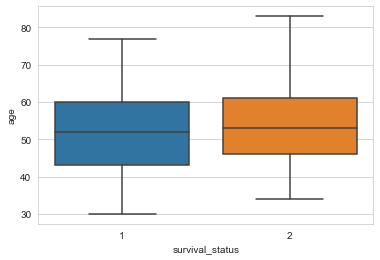

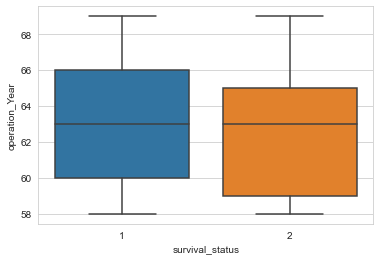

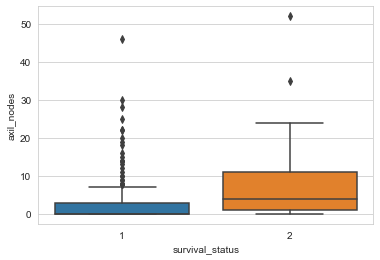

In [35]:
for feature in x[:-1]:
    sns.boxplot(x='survival_status',y=feature, data=df)
    plt.show()

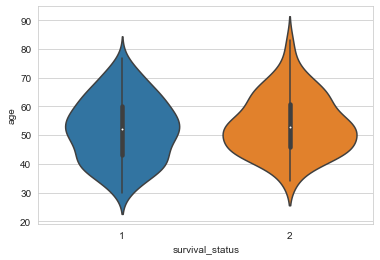

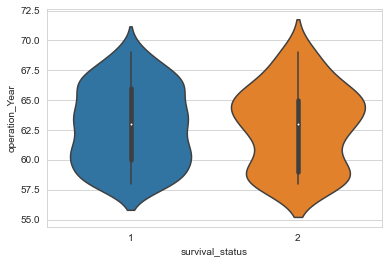

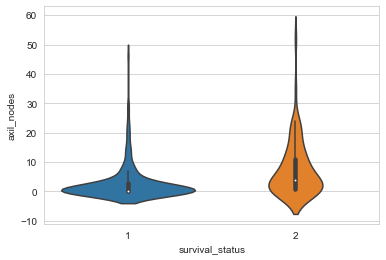

In [39]:
for feature in x[:-1]:
    sns.violinplot(x='survival_status',y=feature, data=df)
    plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


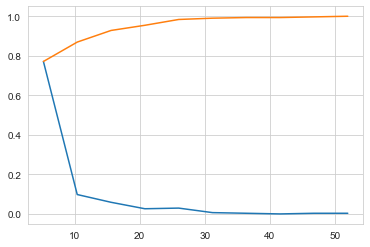

In [38]:
counts, bin_edges = np.histogram(df['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

From the plots we can infer that number of axil nodes is a crucial paramter in the classification here.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


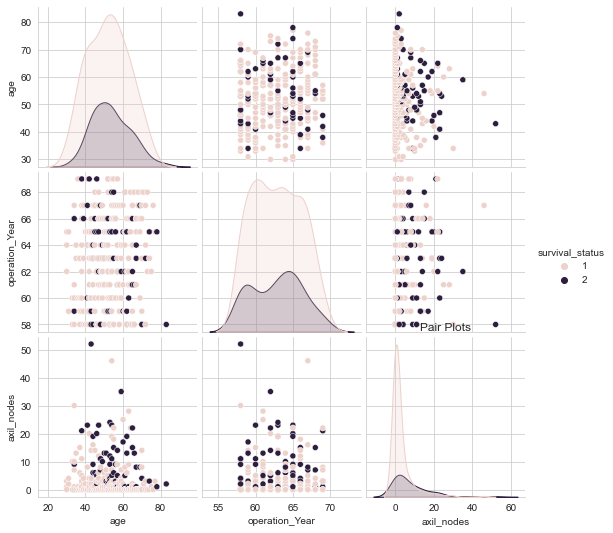

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.pairplot(df, hue='survival_status')
plt.title("Pair Plots")
plt.show()

- Can not interpret much from pairplots.
- axil_nodes and age combined shows relatively high classification among the 2 classes.
- Data is highly imbalanced.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

- High imbalanced dataset.
- Too much overlapping.
- Linear model is out of question.
- Axil nodes is an important feature.